In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\rathi\course8-Renaissa\NdFeB_Recycling_ML_dataset.csv')
data

,research_area,magnet_source,hcl_molarity_M,acid_volume_ml,leaching_time_min,temperature_C,particle_size_um,stirring_speed_rpm,use_organic_acid,organic_acid_type,...,instrument_used,nd_initial_wt_g,nd_concentration_mg_L,nd_recovery_pct,energy_consumption_kwh,co2_emission_kg,sem_porosity_pct,surface_roughness_um,high_recovery_label,eco_friendly_label
0,Magnetic_Materials,Laptop_HDD,4.0,200,60,80,50,600,1,Malic_Acid,...,SEM_EDS_and_ICP_OES,1.336,6.65,99.50,2.118,1.394,5.82,0.900,1,1
1,Power_Electronics,Laptop_HDD,2.0,250,120,40,47,200,0,NaN,...,SEM_EDS_and_ICP_OES,1.114,4.17,93.51,2.787,1.802,1.00,0.387,1,0
2,Renewable_Energy_Systems,Laptop_HDD,1.0,250,180,25,44,200,0,NaN,...,SEM_EDS,1.502,5.27,87.69,3.786,1.653,7.33,0.698,1,0
3,Power_Electronics,EV_Motor,2.0,250,30,80,39,800,0,NaN,...,SEM_EDS_and_ICP_OES,1.445,5.75,99.50,1.658,1.085,4.88,0.769,1,0
4,Power_Electronics,EV_Motor,4.0,150,120,25,55,400,1,Citric_Acid,...,SEM_EDS_and_ICP_OES,1.025,6.80,99.50,2.708,1.420,4.50,0.842,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Magnetic_Materials,EV_Motor,2.0,100,60,25,55,200,1,Citric_Acid,...,SEM_EDS,1.019,7.58,74.37,1.359,0.861,1.81,0.491,0,1
696,Renewable_Energy_Systems,Server_HDD,0.5,200,30,25,42,400,0,NaN,...,SEM_EDS,1.317,4.04,61.40,0.929,0.588,4.72,0.837,0,0
697,Power_Electronics,Server_HDD,2.0,200,60,40,60,200,0,NaN,...,SEM_EDS_and_ICP_OES,1.286,5.29,82.23,1.600,0.897,3.06,0.850,0,0
698,Magnetic_Materials,EV_Motor,4.0,100,60,25,34,600,0,NaN,...,ICP_OES,1.492,13.75,92.17,1.661,1.062,6.07,0.885,1,0


In [3]:
data['temp_leach_interaction_C_min'] = data['temperature_C'] * data['leaching_time_min']  # temperature × time
temp_leach_interaction = pd.DataFrame(data['temp_leach_interaction_C_min'])
temp_leach_interaction

,temp_leach_interaction_C_min
0,4800
1,4800
2,4500
3,2400
4,3000
...,...
695,1500
696,750
697,2400
698,1500


In [4]:
data['particle_recovery_interaction'] = data['particle_size_um'] * data['nd_recovery_pct']  # 1 / particle_size_um (or particle × stirring)
particle_recovery_interaction = pd.DataFrame(data['particle_recovery_interaction'])
particle_recovery_interaction

,particle_recovery_interaction
0,4975.00
1,4394.97
2,3858.36
3,3880.50
4,5472.50
...,...
695,4090.35
696,2578.80
697,4933.80
698,3133.78


In [5]:
data

,research_area,magnet_source,hcl_molarity_M,acid_volume_ml,leaching_time_min,temperature_C,particle_size_um,stirring_speed_rpm,use_organic_acid,organic_acid_type,...,nd_concentration_mg_L,nd_recovery_pct,energy_consumption_kwh,co2_emission_kg,sem_porosity_pct,surface_roughness_um,high_recovery_label,eco_friendly_label,temp_leach_interaction_C_min,particle_recovery_interaction
0,Magnetic_Materials,Laptop_HDD,4.0,200,60,80,50,600,1,Malic_Acid,...,6.65,99.50,2.118,1.394,5.82,0.900,1,1,4800,4975.00
1,Power_Electronics,Laptop_HDD,2.0,250,120,40,47,200,0,NaN,...,4.17,93.51,2.787,1.802,1.00,0.387,1,0,4800,4394.97
2,Renewable_Energy_Systems,Laptop_HDD,1.0,250,180,25,44,200,0,NaN,...,5.27,87.69,3.786,1.653,7.33,0.698,1,0,4500,3858.36
3,Power_Electronics,EV_Motor,2.0,250,30,80,39,800,0,NaN,...,5.75,99.50,1.658,1.085,4.88,0.769,1,0,2400,3880.50
4,Power_Electronics,EV_Motor,4.0,150,120,25,55,400,1,Citric_Acid,...,6.80,99.50,2.708,1.420,4.50,0.842,1,0,3000,5472.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Magnetic_Materials,EV_Motor,2.0,100,60,25,55,200,1,Citric_Acid,...,7.58,74.37,1.359,0.861,1.81,0.491,0,1,1500,4090.35
696,Renewable_Energy_Systems,Server_HDD,0.5,200,30,25,42,400,0,NaN,...,4.04,61.40,0.929,0.588,4.72,0.837,0,0,750,2578.80
697,Power_Electronics,Server_HDD,2.0,200,60,40,60,200,0,NaN,...,5.29,82.23,1.600,0.897,3.06,0.850,0,0,2400,4933.80
698,Magnetic_Materials,EV_Motor,4.0,100,60,25,34,600,0,NaN,...,13.75,92.17,1.661,1.062,6.07,0.885,1,0,1500,3133.78


In [6]:
data.isnull().sum()

research_area                      0
magnet_source                      0
hcl_molarity_M                     0
acid_volume_ml                     0
leaching_time_min                  0
temperature_C                      0
particle_size_um                   0
stirring_speed_rpm                 0
use_organic_acid                   0
organic_acid_type                401
process_route                      0
instrument_used                    0
nd_initial_wt_g                    0
nd_concentration_mg_L              0
nd_recovery_pct                    0
energy_consumption_kwh             0
co2_emission_kg                    0
sem_porosity_pct                   0
surface_roughness_um               0
high_recovery_label                0
eco_friendly_label                 0
temp_leach_interaction_C_min       0
particle_recovery_interaction      0
dtype: int64

In [7]:
data.columns

Index(['research_area', 'magnet_source', 'hcl_molarity_M', 'acid_volume_ml',
       'leaching_time_min', 'temperature_C', 'particle_size_um',
       'stirring_speed_rpm', 'use_organic_acid', 'organic_acid_type',
       'process_route', 'instrument_used', 'nd_initial_wt_g',
       'nd_concentration_mg_L', 'nd_recovery_pct', 'energy_consumption_kwh',
       'co2_emission_kg', 'sem_porosity_pct', 'surface_roughness_um',
       'high_recovery_label', 'eco_friendly_label',
       'temp_leach_interaction_C_min', 'particle_recovery_interaction'],
      dtype='object')

In [8]:
data.dtypes

research_area                     object
magnet_source                     object
hcl_molarity_M                   float64
acid_volume_ml                     int64
leaching_time_min                  int64
temperature_C                      int64
particle_size_um                   int64
stirring_speed_rpm                 int64
use_organic_acid                   int64
organic_acid_type                 object
process_route                     object
instrument_used                   object
nd_initial_wt_g                  float64
nd_concentration_mg_L            float64
nd_recovery_pct                  float64
energy_consumption_kwh           float64
co2_emission_kg                  float64
sem_porosity_pct                 float64
surface_roughness_um             float64
high_recovery_label                int64
eco_friendly_label                 int64
temp_leach_interaction_C_min       int64
particle_recovery_interaction    float64
dtype: object

In [9]:
for i in data.columns:
    print(data[i].unique())

['Magnetic_Materials' 'Power_Electronics' 'Renewable_Energy_Systems'
 'Embedded_Systems_for_Recycling']
['Laptop_HDD' 'EV_Motor' 'Server_HDD' 'Wind_Turbine_Generator']
[4.  2.  1.  0.5]
[200 250 150 100  50]
[ 60 120 180  30  90]
[80 40 25 60]
[50 47 44 39 55 75 52 65 29 34 28 68 64 54 27 53 22 37 49 58 17 48 63 60
 59 38 21 71 61 56 42 36 74 45 70 78 26 46 57 32 73 51 69 30 41 14 31 83
 67 62 80 33 72 97 19 79 25 43 20 10 35 40 92 66 77 11 85 23 81 24 13 76]
[600 200 800 400]
[1 0]
['Malic_Acid' nan 'Citric_Acid']
['Hydrometallurgical' 'Hybrid' 'Pyrometallurgical']
['SEM_EDS_and_ICP_OES' 'SEM_EDS' 'ICP_OES']
[1.336 1.114 1.502 1.445 1.025 1.121 0.918 1.144 1.376 1.199 1.33  1.033
 1.381 1.178 1.263 1.247 1.07  1.088 1.406 1.321 1.419 1.31  1.282 1.002
 1.22  1.257 1.554 1.364 1.491 1.351 1.154 1.279 1.296 1.12  1.203 1.23
 0.949 1.442 1.055 1.438 1.371 1.449 1.57  1.345 1.238 1.312 1.448 1.163
 1.215 0.945 0.978 1.269 1.391 1.189 1.513 1.042 1.44  1.362 1.004 1.6
 1.251 1.129 1.05  1.

In [10]:
# Create a copy of the numeric data to avoid modifying the original
no_outlier = data.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64", "int32", "int16", "int8"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf

# Apply outlier cleanup to specific columns
my_conti_cols = ['particle_size_um', 'nd_initial_wt_g', 'nd_concentration_mg_L', 'nd_recovery_pct', 'energy_consumption_kwh', 'co2_emission_kg', 
                 'sem_porosity_pct', 'surface_roughness_um', 'temp_leach_interaction_C_min', 'particle_recovery_interaction']
for col in my_conti_cols:
    outlier_cleanup(col)

no_outlier

,research_area,magnet_source,hcl_molarity_M,acid_volume_ml,leaching_time_min,temperature_C,particle_size_um,stirring_speed_rpm,use_organic_acid,organic_acid_type,...,nd_concentration_mg_L,nd_recovery_pct,energy_consumption_kwh,co2_emission_kg,sem_porosity_pct,surface_roughness_um,high_recovery_label,eco_friendly_label,temp_leach_interaction_C_min,particle_recovery_interaction
0,Magnetic_Materials,Laptop_HDD,4.0,200,60,80,50,600,1,Malic_Acid,...,6.65,99.50000,2.118,1.394,5.82,0.900,1,1,4800,4975.00
1,Power_Electronics,Laptop_HDD,2.0,250,120,40,47,200,0,NaN,...,4.17,93.51000,2.787,1.802,1.00,0.387,1,0,4800,4394.97
2,Renewable_Energy_Systems,Laptop_HDD,1.0,250,180,25,44,200,0,NaN,...,5.27,87.69000,3.786,1.653,7.33,0.698,1,0,4500,3858.36
3,Power_Electronics,EV_Motor,2.0,250,30,80,39,800,0,NaN,...,5.75,99.50000,1.658,1.085,4.88,0.769,1,0,2400,3880.50
4,Power_Electronics,EV_Motor,4.0,150,120,25,55,400,1,Citric_Acid,...,6.80,99.50000,2.708,1.420,4.50,0.842,1,0,3000,5472.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Magnetic_Materials,EV_Motor,2.0,100,60,25,55,200,1,Citric_Acid,...,7.58,74.37000,1.359,0.861,1.81,0.491,0,1,1500,4090.35
696,Renewable_Energy_Systems,Server_HDD,0.5,200,30,25,42,400,0,NaN,...,4.04,66.58125,0.929,0.588,4.72,0.837,0,0,750,2578.80
697,Power_Electronics,Server_HDD,2.0,200,60,40,60,200,0,NaN,...,5.29,82.23000,1.600,0.897,3.06,0.850,0,0,2400,4933.80
698,Magnetic_Materials,EV_Motor,4.0,100,60,25,34,600,0,NaN,...,13.75,92.17000,1.661,1.062,6.07,0.885,1,0,1500,3133.78


In [11]:
# Label Encoding in categorical columns
from sklearn import preprocessing

categ = data.select_dtypes(exclude="number")

for i in categ.columns:
    encoder = preprocessing.LabelEncoder()  # Encoder is the object of 'LabelEncoder'.
    no_outlier[i] = encoder.fit_transform(no_outlier[i])

no_outlier

,research_area,magnet_source,hcl_molarity_M,acid_volume_ml,leaching_time_min,temperature_C,particle_size_um,stirring_speed_rpm,use_organic_acid,organic_acid_type,...,nd_concentration_mg_L,nd_recovery_pct,energy_consumption_kwh,co2_emission_kg,sem_porosity_pct,surface_roughness_um,high_recovery_label,eco_friendly_label,temp_leach_interaction_C_min,particle_recovery_interaction
0,1,1,4.0,200,60,80,50,600,1,1,...,6.65,99.50000,2.118,1.394,5.82,0.900,1,1,4800,4975.00
1,2,1,2.0,250,120,40,47,200,0,2,...,4.17,93.51000,2.787,1.802,1.00,0.387,1,0,4800,4394.97
2,3,1,1.0,250,180,25,44,200,0,2,...,5.27,87.69000,3.786,1.653,7.33,0.698,1,0,4500,3858.36
3,2,0,2.0,250,30,80,39,800,0,2,...,5.75,99.50000,1.658,1.085,4.88,0.769,1,0,2400,3880.50
4,2,0,4.0,150,120,25,55,400,1,0,...,6.80,99.50000,2.708,1.420,4.50,0.842,1,0,3000,5472.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,2.0,100,60,25,55,200,1,0,...,7.58,74.37000,1.359,0.861,1.81,0.491,0,1,1500,4090.35
696,3,2,0.5,200,30,25,42,400,0,2,...,4.04,66.58125,0.929,0.588,4.72,0.837,0,0,750,2578.80
697,2,2,2.0,200,60,40,60,200,0,2,...,5.29,82.23000,1.600,0.897,3.06,0.850,0,0,2400,4933.80
698,1,0,4.0,100,60,25,34,600,0,2,...,13.75,92.17000,1.661,1.062,6.07,0.885,1,0,1500,3133.78


In [12]:
from sklearn.preprocessing import MinMaxScaler

def my_scaling(col):
    my_scaling_obj = MinMaxScaler()
    no_outlier[col] = pd.DataFrame(my_scaling_obj.fit_transform(no_outlier[col].to_numpy().reshape(-1,1)))
    return no_outlier[col]
my_numerical_cols = ['hcl_molarity_M', 'acid_volume_ml', 'leaching_time_min', 'temperature_C', 'particle_size_um',
       'stirring_speed_rpm', 'nd_initial_wt_g', 'nd_concentration_mg_L', 'nd_recovery_pct', 'energy_consumption_kwh',
       'co2_emission_kg', 'sem_porosity_pct', 'surface_roughness_um', 'temp_leach_interaction_C_min', 'particle_recovery_interaction']
for i in my_numerical_cols:
    no_outlier[i] = my_scaling(i)
no_outlier

,research_area,magnet_source,hcl_molarity_M,acid_volume_ml,leaching_time_min,temperature_C,particle_size_um,stirring_speed_rpm,use_organic_acid,organic_acid_type,...,nd_concentration_mg_L,nd_recovery_pct,energy_consumption_kwh,co2_emission_kg,sem_porosity_pct,surface_roughness_um,high_recovery_label,eco_friendly_label,temp_leach_interaction_C_min,particle_recovery_interaction
0,1,1,1.000000,0.75,0.2,1.000000,0.506329,0.666667,1,1,...,0.201360,1.000000,0.368530,0.498245,0.548117,0.605342,1,1,0.442623,0.551408
1,2,1,0.428571,1.00,0.6,0.272727,0.468354,0.000000,0,2,...,0.057862,0.818037,0.547707,0.692404,0.000000,0.130782,1,0,0.442623,0.474869
2,3,1,0.142857,1.00,1.0,0.000000,0.430380,0.000000,0,2,...,0.121510,0.641238,0.815266,0.621498,0.719829,0.418478,1,0,0.409836,0.404060
3,2,0,0.428571,1.00,0.0,1.000000,0.367089,1.000000,0,2,...,0.149284,1.000000,0.245330,0.351199,0.441222,0.484158,1,0,0.180328,0.406981
4,2,0,1.000000,0.50,0.6,0.000000,0.569620,0.333333,1,0,...,0.210039,1.000000,0.526548,0.510618,0.398010,0.551688,1,0,0.245902,0.617057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0.428571,0.25,0.2,0.000000,0.569620,0.000000,1,0,...,0.255171,0.236605,0.165249,0.244602,0.092111,0.226989,0,1,0.081967,0.434672
696,3,2,0.000000,0.75,0.0,0.000000,0.405063,0.333333,0,2,...,0.050340,0.000000,0.050084,0.114687,0.423028,0.547063,0,0,0.000000,0.235213
697,2,2,0.428571,0.75,0.2,0.272727,0.632911,0.000000,0,2,...,0.122667,0.475375,0.229796,0.261733,0.234257,0.559089,0,0,0.180328,0.545971
698,1,0,1.000000,0.25,0.2,0.000000,0.303797,0.666667,0,2,...,0.612180,0.777331,0.246133,0.340253,0.576546,0.591466,1,0,0.081967,0.308446


# Multiple Linear Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # y = m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5 + c + e (Multiple Linear Regression)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
my_corr = no_outlier.corr()[['particle_recovery_interaction']].sort_values(by='particle_recovery_interaction', ascending=False)
my_corr

,particle_recovery_interaction
particle_recovery_interaction,1.000000
particle_size_um,0.950808
surface_roughness_um,0.296889
nd_recovery_pct,0.189455
high_recovery_label,0.170093
temperature_C,0.169621
hcl_molarity_M,0.152588
temp_leach_interaction_C_min,0.137814
energy_consumption_kwh,0.110945
stirring_speed_rpm,0.102652


In [16]:
# Check multi-colinearity between independent variables using the VIF score.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
no_energy_consumption = no_outlier.drop("particle_recovery_interaction", axis=1)
no_energy_consumption

,research_area,magnet_source,hcl_molarity_M,acid_volume_ml,leaching_time_min,temperature_C,particle_size_um,stirring_speed_rpm,use_organic_acid,organic_acid_type,...,nd_initial_wt_g,nd_concentration_mg_L,nd_recovery_pct,energy_consumption_kwh,co2_emission_kg,sem_porosity_pct,surface_roughness_um,high_recovery_label,eco_friendly_label,temp_leach_interaction_C_min
0,1,1,1.000000,0.75,0.2,1.000000,0.506329,0.666667,1,1,...,0.658915,0.201360,1.000000,0.368530,0.498245,0.548117,0.605342,1,1,0.442623
1,2,1,0.428571,1.00,0.6,0.272727,0.468354,0.000000,0,2,...,0.372093,0.057862,0.818037,0.547707,0.692404,0.000000,0.130782,1,0,0.442623
2,3,1,0.142857,1.00,1.0,0.000000,0.430380,0.000000,0,2,...,0.873385,0.121510,0.641238,0.815266,0.621498,0.719829,0.418478,1,0,0.409836
3,2,0,0.428571,1.00,0.0,1.000000,0.367089,1.000000,0,2,...,0.799742,0.149284,1.000000,0.245330,0.351199,0.441222,0.484158,1,0,0.180328
4,2,0,1.000000,0.50,0.6,0.000000,0.569620,0.333333,1,0,...,0.257106,0.210039,1.000000,0.526548,0.510618,0.398010,0.551688,1,0,0.245902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0.428571,0.25,0.2,0.000000,0.569620,0.000000,1,0,...,0.249354,0.255171,0.236605,0.165249,0.244602,0.092111,0.226989,0,1,0.081967
696,3,2,0.000000,0.75,0.0,0.000000,0.405063,0.333333,0,2,...,0.634367,0.050340,0.000000,0.050084,0.114687,0.423028,0.547063,0,0,0.000000
697,2,2,0.428571,0.75,0.2,0.272727,0.632911,0.000000,0,2,...,0.594315,0.122667,0.475375,0.229796,0.261733,0.234257,0.559089,0,0,0.180328
698,1,0,1.000000,0.25,0.2,0.000000,0.303797,0.666667,0,2,...,0.860465,0.612180,0.777331,0.246133,0.340253,0.576546,0.591466,1,0,0.081967


In [19]:
no_of_cols = no_energy_consumption.shape[1]
no_of_cols

22

In [20]:
def myVIF(x):
    vif = pd.Series(name="vif")
    for i in range(0, no_of_cols):
        vif[x.columns[i]] = variance_inflation_factor(x.values, i)
    return vif

vif_values = myVIF(no_energy_consumption)
print(vif_values)

research_area                      3.363945
magnet_source                      2.970854
hcl_molarity_M                     4.084431
acid_volume_ml                    17.165898
leaching_time_min                744.362834
temperature_C                     58.458181
particle_size_um                   8.947983
stirring_speed_rpm                14.118841
use_organic_acid                   9.717134
organic_acid_type                 15.881777
process_route                      2.952854
instrument_used                    3.244697
nd_initial_wt_g                   11.295127
nd_concentration_mg_L             14.272070
nd_recovery_pct                   58.016368
energy_consumption_kwh          1241.785401
co2_emission_kg                   24.268927
sem_porosity_pct                   5.060122
surface_roughness_um               9.075278
high_recovery_label               14.363319
eco_friendly_label                 2.889633
temp_leach_interaction_C_min      46.030446
Name: vif, dtype: float64


In [21]:
# We should take the columns in which VIF scores are less than 10.
# 'particle_size_um', 'surface_roughness_um', 'temperature_C', and 'hcl_molarity_M' (based on correlation with the target column and VIF score).

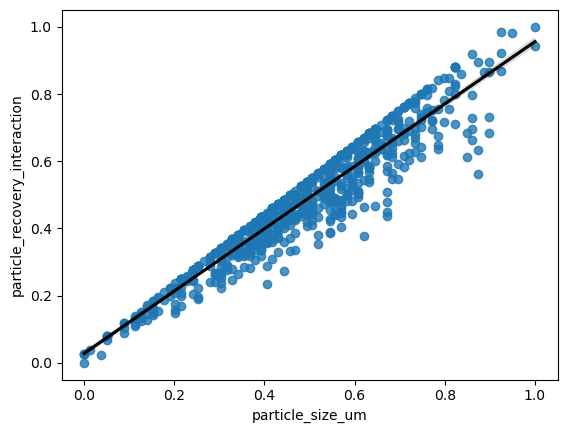

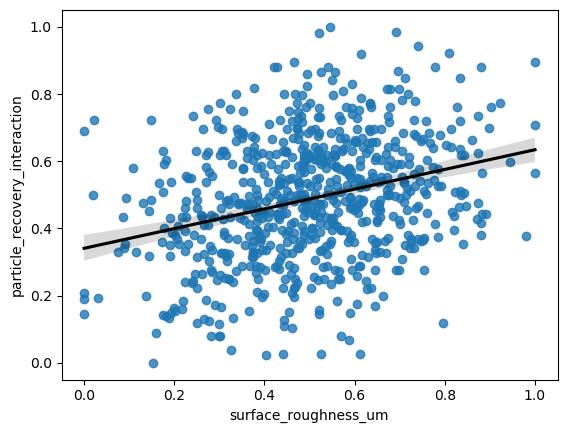

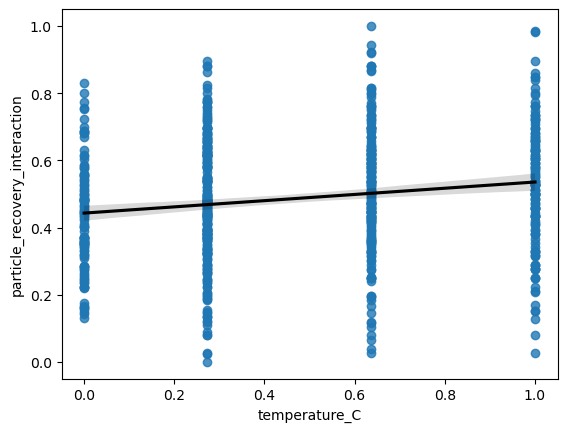

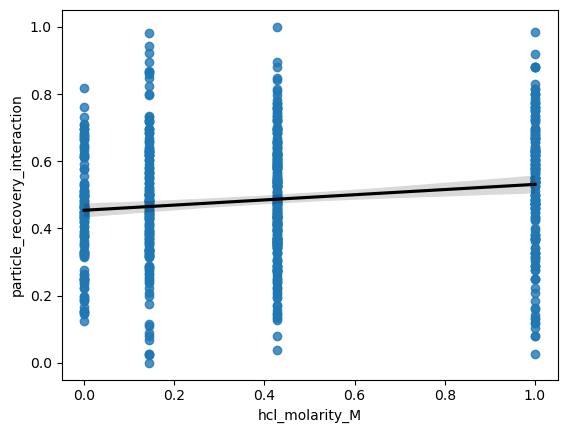

In [22]:
my_cols = ['particle_size_um', 'surface_roughness_um', 'temperature_C', 'hcl_molarity_M']
for i in my_cols:
    sns.regplot(x=i, y="particle_recovery_interaction", data=no_outlier, line_kws={"color":"black"})
    plt.show()

In [23]:
x_new = no_outlier[['particle_size_um', 'surface_roughness_um', 'temperature_C', 'hcl_molarity_M']].to_numpy().reshape(-1,4)
x_new

array([[0.50632911, 0.60534228, 1.        , 1.        ],
       [0.46835443, 0.13078168, 0.27272727, 0.42857143],
       [0.43037975, 0.41847826, 0.        , 0.14285714],
       ...,
       [0.63291139, 0.55908881, 0.27272727, 0.42857143],
       [0.30379747, 0.59146623, 0.        , 1.        ],
       [0.83544304, 0.49525902, 1.        , 0.14285714]])

In [24]:
y_new = no_outlier["particle_recovery_interaction"].to_numpy().reshape(-1, 1)
y_new

array([[0.55140808],
       [0.47486915],
       [0.40405978],
       [0.40698131],
       [0.61705661],
       [0.82422886],
       [0.57766749],
       [0.74835367],
       [0.24449624],
       [0.55433752],
       [0.22396508],
       [0.25405652],
       [0.40698131],
       [0.77293723],
       [0.72171159],
       [0.6039269 ],
       [0.22430685],
       [0.43238564],
       [0.44730072],
       [0.53960322],
       [0.1837763 ],
       [0.35865343],
       [0.53827837],
       [0.60922365],
       [0.11812777],
       [0.52514867],
       [0.57602067],
       [0.571707  ],
       [0.68270514],
       [0.5961586 ],
       [0.35358629],
       [0.16549236],
       [0.39622155],
       [0.66043742],
       [0.72210614],
       [0.67796525],
       [0.57675963],
       [0.58680946],
       [0.44637043],
       [0.47561734],
       [0.87965074],
       [0.36759219],
       [0.80968986],
       [0.4525658 ],
       [0.75765663],
       [0.27568425],
       [0.54469675],
       [0.281

In [25]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, train_size = 0.8, random_state = 0)

In [26]:
# 'multi' is the name of the trained model.

In [27]:
model = LinearRegression()  # Step 1: Build a model using an algorithm.
multi = model.fit(x_new_train, y_new_train)  # Step 2: Fit the model. # Here, we are building the model and training it in the same line.

In [28]:
# Step 3: Check training performance of the model.
r_square = multi.score(x_new_train, y_new_train)
print("R-square:", r_square)  # Training model performance is 94%, which is very good. A bad model will not give good results.

R-square: 0.9404488422546123


In [29]:
# Step 4: Predict through unseen data using predict().
y_new_pred = multi.predict(x_new_test)  # We are predicting the values of y_test and storing it as 'y_prediction'. The input is given by passing the input as x_test -> if not matching, it is an error or residual (for numerical columns).
y_new_pred  # This is predicting and comparing with 'y_new_test' values.

array([[0.66209195],
       [0.72594455],
       [0.84180785],
       [0.63599357],
       [0.67078055],
       [0.36684284],
       [0.77476749],
       [0.1388409 ],
       [0.81365436],
       [0.53556885],
       [0.45074925],
       [0.61336146],
       [0.73745023],
       [0.55731243],
       [0.62083497],
       [0.49468133],
       [0.35030685],
       [0.65661326],
       [0.60196479],
       [0.40451691],
       [0.37259748],
       [0.56419892],
       [0.55526102],
       [0.618727  ],
       [0.13775551],
       [0.60726838],
       [0.41026042],
       [0.28025013],
       [0.4976627 ],
       [0.44697362],
       [0.61811365],
       [0.35682144],
       [0.3253954 ],
       [0.31955559],
       [0.62834849],
       [0.43955068],
       [0.64702515],
       [0.66696453],
       [0.51141163],
       [0.7196594 ],
       [0.48845351],
       [0.63827291],
       [0.1975967 ],
       [0.50483638],
       [0.80862283],
       [0.64979121],
       [0.61182581],
       [0.077

In [30]:
mse = mean_squared_error(y_new_test, y_new_pred)
print("MSE:", mse)  # Smaller errors are better. Example: 2 is better than 2000 errors in case of MSE. MSE is numerical, not %, all errors are %.

MSE: 0.002089821848774998


In [31]:
# Step 5: Check testing (r_square) performance of the model. -> Checks the reliability of the model.
r2_new = r2_score(y_new_test, y_new_pred)
print("New R-squared:", r2_new)  # The model performance is 93.5%, which is very good.

New R-squared: 0.9351283071352108


In [32]:
# Linear regression works better when there is more than one input column.

In [33]:
multi.intercept_  # The linear regression model gives the intercept value.

array([-0.03429484])

In [34]:
multi.coef_  # Since we have taken 4 independent variables, we get 4 slopes for each line of best fit.

array([[0.9172794 , 0.00358398, 0.06965813, 0.07511047]])

In [35]:
# Create a table containing residuals.
df_residual = pd.DataFrame()  # Creating an empty DataFrame
df_residual["y_pred"] = pd.DataFrame(y_new_pred)  # 'y_pred' - Creating a new column
# Assigning all 'y_new_pred' values to a 'y_pred' column in a DataFrame

In [36]:
df_residual["y_actual"] = pd.DataFrame(y_new_test)

In [37]:
# Residual = |Predicted - Actual|
df_residual["Residual"] = abs(df_residual["y_pred"] - df_residual["y_actual"])  # Error is calculated for each row.
df_residual  # Table with actual, predicted, and residual values

,y_pred,y_actual,Residual
0,0.662092,0.718162,0.056070
1,0.725945,0.722094,0.003850
2,0.841808,0.879651,0.037843
3,0.635994,0.631440,0.004554
4,0.670781,0.721712,0.050931
...,...,...,...
135,0.591636,0.617335,0.025699
136,0.304385,0.353768,0.049383
137,0.572896,0.584403,0.011507
138,0.357865,0.384686,0.026821


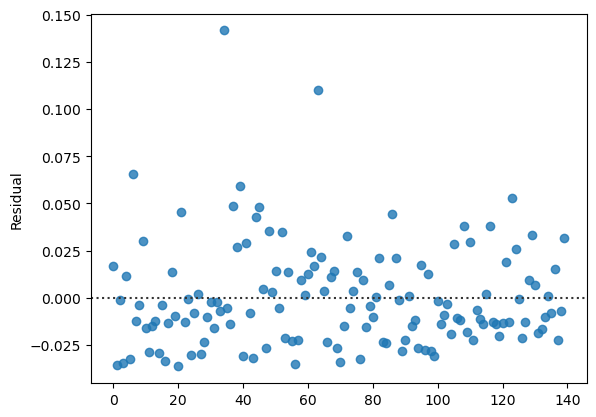

In [38]:
# Check if the assumption 'Homascedasticity' is applicable for this model.
sns.residplot(x = df_residual.index, y = "Residual", data = df_residual);

In [39]:
# According to the 'Residual' visual, homoscedasticity is followed.

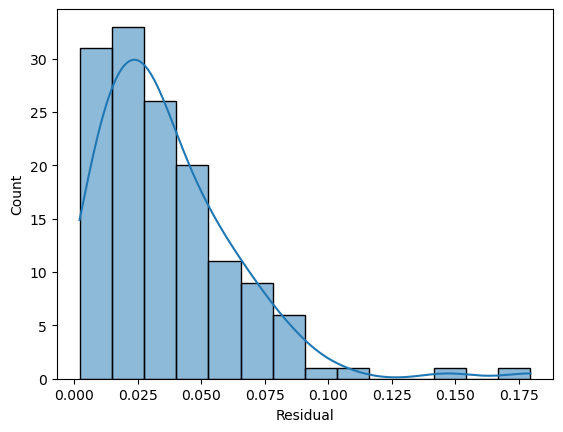

In [40]:
# Assumption normality of residuals
sns.histplot(df_residual["Residual"], kde=True);

In [41]:
# This assumption fails because errors are not normally distributed.

# Logistic Regression

In [43]:
len(no_outlier)

700

In [44]:
# Target column = 'energy_consumption_kwh' is to be predicted. So, it will be considered as a dependent column.
# All other columns except for the column 'energy_consumption_kwh' will be independent.

In [45]:
# We split the table into 4 parts that are called:
# x_train (training independent)
# x_test (testing independent)
# y_train (training dependent)
# y_test (testing dependent)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve

In [132]:
# Features: ["hcl_molarity_M", "temperature_C", "leaching_time_min", "particle_size_um", "stirring_speed_rpm", 
#            "temp_leach_interaction_C_min", "particle_recovery_interaction"]
"""
1. hcl_molarity_M:
A higher concentration of HCl significantly boosts Nd leaching efficiency.
In your synthetic generator, it led to a direct increase in recovery.
This is one of the most reliable true predictors.

2. temperature_C:
It is utilized to enhance Nd recovery through kinetic effects.
Higher temperatures result in higher recovery, making it more likely to reach ≥ 85%.
Logistic regression effectively manages this feature.

3. leaching_time_min: 
Longer leaching times yield higher recovery rates. 
This shows an “almost linear” effect, which is ideal for logistic regression.

4. particle_size_um:
Smaller particles lead to a larger surface area, resulting in more effective acid leaching.
In the synthetic generator, smaller particles directly improved recovery.
Logistic regression takes advantage of this effect due to its monotonic nature.

5. stirring_speed_rpm:
Enhancing mass transfer improves leaching performance.
This has a significant impact on recovery efficiency and adds a unique aspect to the model.

6. "temp_leach_interaction_C_min" and "particle_recovery_interaction" - result in a higher accuracy, f-1, and ROC-AUC score
"""

'\n1. hcl_molarity_M:\nA higher concentration of HCl significantly boosts Nd leaching efficiency.\nIn your synthetic generator, it led to a direct increase in recovery.\nThis is one of the most reliable true predictors.\n\n2. temperature_C:\nIt is utilized to enhance Nd recovery through kinetic effects.\nHigher temperatures result in higher recovery, making it more likely to reach ≥ 85%.\nLogistic regression effectively manages this feature.\n\n3. leaching_time_min: \nLonger leaching times yield higher recovery rates. \nThis shows an “almost linear” effect, which is ideal for logistic regression.\n\n4. particle_size_um:\nSmaller particles lead to a larger surface area, resulting in more effective acid leaching.\nIn the synthetic generator, smaller particles directly improved recovery.\nLogistic regression takes advantage of this effect due to its monotonic nature.\n\n5. stirring_speed_rpm:\nEnhancing mass transfer improves leaching performance.\nThis has a significant impact on recover

Accuracy : 0.8672985781990521
F1 Score : 0.9204545454545454
ROC-AUC  : 0.9199426111908179

Confusion Matrix:
 [[ 21  20]
 [  8 162]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.51      0.60        41
           1       0.89      0.95      0.92       170

    accuracy                           0.87       211
   macro avg       0.81      0.73      0.76       211
weighted avg       0.86      0.87      0.86       211



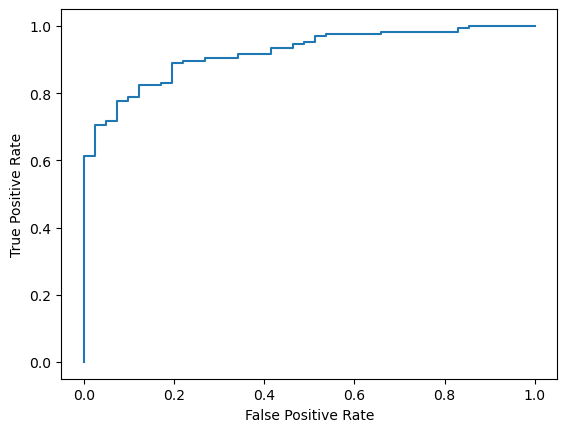

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.920


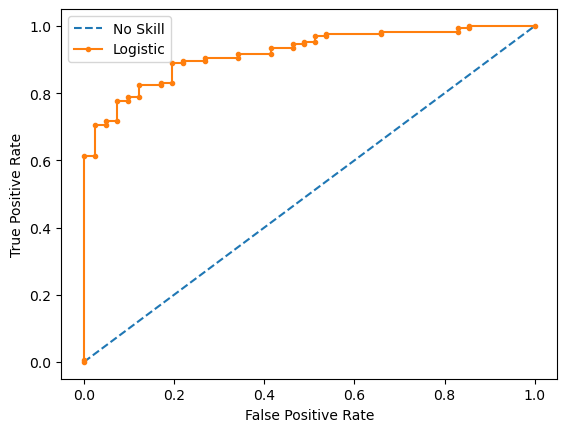

In [104]:
# Logistic Regression
# 1. Feature set
features = ["hcl_molarity_M", "temperature_C", "leaching_time_min", "particle_size_um", "stirring_speed_rpm", 
            "temp_leach_interaction_C_min", "particle_recovery_interaction"]
x = no_outlier[features]
y = no_outlier['high_recovery_label']  # clean, binary, and well linked to the physical features

# 2. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

# 3. Build and fit Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# 4. Predict on test set
y_pred = logreg.predict(x_test)
y_prob = logreg.predict_proba(x_test)

# 5. Evaluation metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1]))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob[:,1], pos_label = 1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

lr_probs = logreg.predict_proba(x_test)
ns_probs = [0 for _ in range(len(y_test))]  # We are using list comprehension.

# 6. ROC curve
lr_probs = lr_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# Add axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show the legend
plt.legend()
# Show the plot
plt.show()

# K-Nearest Neighbors

In [130]:
# Features: ["hcl_molarity_M", "temperature_C", "leaching_time_min", "particle_size_um", "stirring_speed_rpm", 
#            "temp_leach_interaction_C_min", "particle_recovery_interaction"]
"""
1. hcl_molarity_M:
Increased molarity → significantly improved Nd recovery.
This is one of the most powerful nonlinear factors.

2. temperature_C:
Higher temperatures greatly enhance leaching kinetics.
Clusters in the temp–time–recovery space become clearly defined.

3. leaching_time_min - Time–temperature interactions lead to distinct recovery groupings that KNN can utilize.

4. particle_size_um:
Smaller particle size → larger surface area → improved recovery.
KNN effectively recognizes this physical clustering.

5. stirring_speed_rpm:
More agitation → better mass transfer → increased recovery.
This helps to distinguish borderline recovery samples.

6. "temp_leach_interaction_C_min" and "particle_recovery_interaction" - result in a higher accuracy score
"""

'\n1. hcl_molarity_M:\nIncreased molarity → significantly improved Nd recovery.\nThis is one of the most powerful nonlinear factors.\n\n2. temperature_C:\nHigher temperatures greatly enhance leaching kinetics.\nClusters in the temp–time–recovery space become clearly defined.\n\n3. leaching_time_min - Time–temperature interactions lead to distinct recovery groupings that KNN can utilize.\n\n4. particle_size_um:\nSmaller particle size → larger surface area → improved recovery.\nKNN effectively recognizes this physical clustering.\n\n5. stirring_speed_rpm:\nMore agitation → better mass transfer → increased recovery.\nThis helps to distinguish borderline recovery samples.\n\n6. "temp_leach_interaction_C_min" and "particle_recovery_interaction" - result in a higher accuracy score\n'

700
26
0.8793456032719836
[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0
 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
[0 1]
26
22
[0.7962085308056872, 0.8104265402843602, 0.8246445497630331, 0.8436018957345972, 0.8104265402843602, 0.8056872037914692, 0.8199052132701422, 0.8341232227488151, 0.8341232227488151, 0.8388625592417062, 0.8341232227488151, 0.8483412322274881, 0.8388625592417062, 0.8388625592417062, 0.8436018957345972, 0.8388625592417062, 0.8483412322274881, 0.8436018957345972, 0.8388625592417062, 0.8341232227488151, 0.8436018957345972, 0.8530805687203792, 0.8625592417061612, 0.8483412322274881, 0.8530805687203792, 0.8436018957345972, 0.8436018957

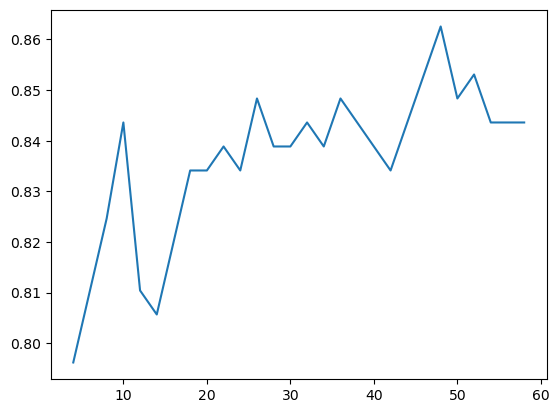

In [50]:
# Split again from the full processed data

# y: target variable is 'meets_spec'
y = no_outlier["high_recovery_label"]

# Drop target and irrelevant columns from features
x = no_outlier[["hcl_molarity_M", "temperature_C", "leaching_time_min", "particle_size_um", "stirring_speed_rpm", 
                "temp_leach_interaction_C_min", "particle_recovery_interaction"]]
# provide the strongest separation between high-recovery and low-recovery groups

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

n = len(no_outlier)  # number of elements (rows) in a dataset without any outliers (input variable)
print(n)
# Assume the value 'k' as the square root of the number of elements (rows) in an array
k = int(round(n)**0.5)
print(k)  # This is NOT the best value of 'k'.

from sklearn.neighbors import KNeighborsClassifier
my_knn = KNeighborsClassifier(26)  # k-value needs to be selected by the user (k = 26).
my_model_1 = my_knn.fit(x_train, y_train)  # Train the model.
print(my_model_1.score(x_train, y_train))

y_pred = my_model_1.predict(x_test)
print(y_pred)

my_model_1.classes_  # The class refers to unique values of the target column in a classification problem.
print(my_model_1.classes_)

my_model_1.n_neighbors
print(my_model_1.n_neighbors)

k2 = int(round(len(x_train)**0.5, 0))  # Initial but NOT final 'k'
print(k2)

# To find the value of 'k', we will create multiple temporary models.
accuracy = []
k_values = np.arange(4, 60, 2)
for my_k2 in k_values:
    temp = KNeighborsClassifier(my_k2)
    temp.fit(x_train, y_train)
    y2_pred = temp.predict(x_test)
    accuracy.append(accuracy_score(y_test, y2_pred))
print(accuracy)
print(k_values)

plt.plot(k_values, accuracy);

# By looking at the above plot, we will finalize the k-value as 22 to get maximum accuracy.
final_model = KNeighborsClassifier(k2)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)
print(accuracy_score(y_test, y_pred))

# K-Means Clustering

In [126]:
"""
features = [
    "leaching_time_min",
    "temperature_C",
    "stirring_speed_rpm",
    "process_route",               # after label encoding or one-hot
    "temp_leach_interaction_C_min"       # temperature × leaching_time_min
]

1. leaching_time_min - the most significant factor
Coefficient = 0.02, indicating a major impact on energy consumption.
Long leaching time → high energy consumption.
Short leaching time → low energy consumption.

2. temperature_C - the second most impactful factor
Coefficient = 0.01 × (temperature – 25).
This results in clear "temperature-energy" clusters.

3. stirring_speed_rpm
Coefficient = 0.0005, though small, it is still important.
Faster stirring leads to increased electrical energy consumption.
This assists K-Means in distinguishing: low-intensity experimental methods and high-intensity, energy-intensive methods.

4. process_route - Various routes lead to systematic differences in energy use:
Hydrometallurgical → moderate energy use
Pyrometallurgical → higher energy use
Hybrid → varied energy consumption
This provides a framework for K-Means to cluster around.

5. temp_leach_interaction_C_min (temperature_C × leaching_time_min) - This interaction term highlights that:
long leaching time + high temperature → significantly increased energy consumption
This results in strong, easily distinguishable clusters in the feature space.
"""

'\nfeatures = [\n    "leaching_time_min",\n    "temperature_C",\n    "stirring_speed_rpm",\n    "process_route",               # after label encoding or one-hot\n    "temp_leach_interaction_C_min"       # temperature × leaching_time_min\n]\n\n1. leaching_time_min - the most significant factor\nCoefficient = 0.02, indicating a major impact on energy consumption.\nLong leaching time → high energy consumption.\nShort leaching time → low energy consumption.\n\n2. temperature_C - the second most impactful factor\nCoefficient = 0.01 × (temperature – 25).\nThis results in clear "temperature-energy" clusters.\n\n3. stirring_speed_rpm\nCoefficient = 0.0005, though small, it is still important.\nFaster stirring leads to increased electrical energy consumption.\nThis assists K-Means in distinguishing: low-intensity experimental methods and high-intensity, energy-intensive methods.\n\n4. process_route - Various routes lead to systematic differences in energy use:\nHydrometallurgical → moderate ene

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

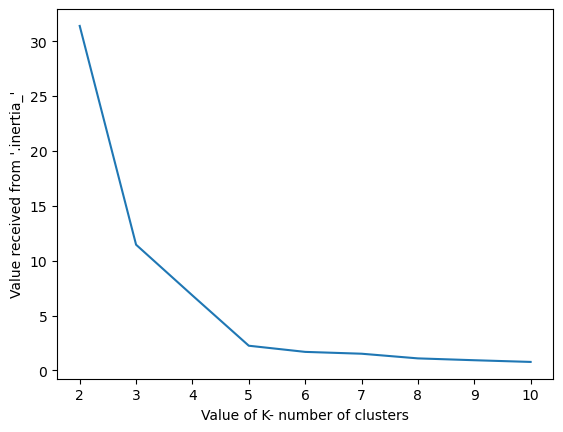

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 60.4
For clusters = 2 , the davies bouldin score is 0.62
For clusters = 2 , the calinski harabasz score is 1301.0

For clusters = 3 , the silhouette score is 65.91
For clusters = 3 , the davies bouldin score is 0.47
For clusters = 3 , the calinski harabasz score is 2386.97

For clusters = 4 , the silhouette score is 66.21
For clusters = 4 , the davies bouldin score is 0.37
For clusters = 4 , the calinski harabasz score is 2802.97

For clusters = 5 , the silhouette score is 74.31
For clusters = 5 , the davies bouldin score is 0.33
For clusters = 5 , the calinski harabasz score is 6783.3

For clusters = 6 , the silhouette score is 69.03
For clusters = 6 , the davies bouldin score is 0.41
For clusters = 6 , the calinski harabasz score is 6453.39

For clusters = 7 , the silhouette score is 65.72
For clusters = 7 , the davies bouldin score is 0.45
For clusters = 7 , the calinski harabasz score is 6150.3

For clusters = 8 , the silhouette score is 6

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 10 , the silhouette score is 60.76
For clusters = 10 , the davies bouldin score is 0.51
For clusters = 10 , the calinski harabasz score is 8948.0

0.558317276706598


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.65908416465565
0.6621435292096373


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.74312807103758
0.723686453250835


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6869003221024249


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6336859401504389


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.5959502287705803


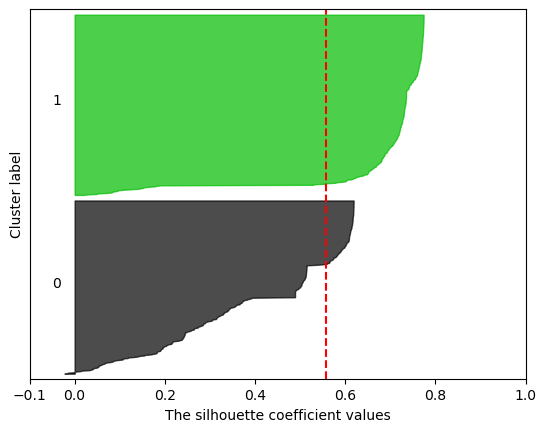

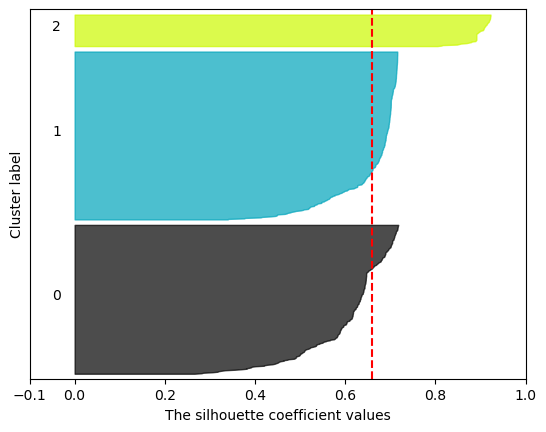

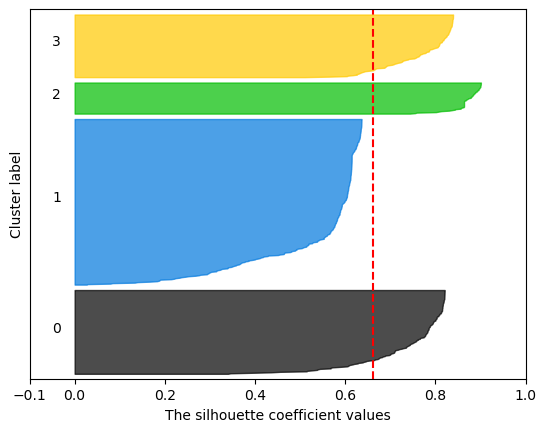

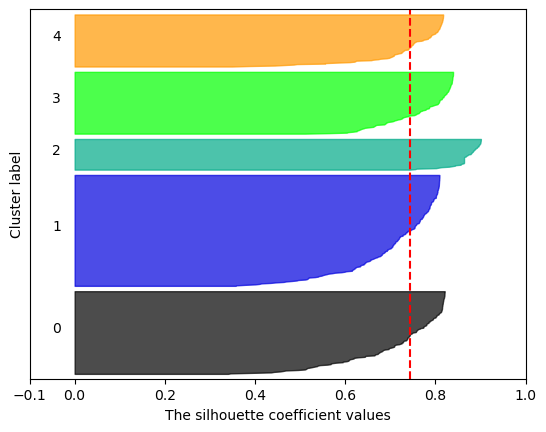

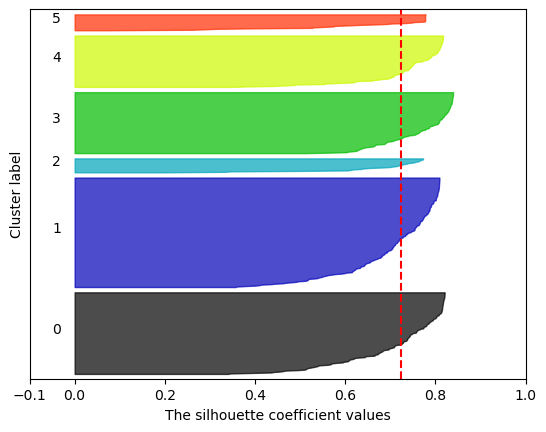

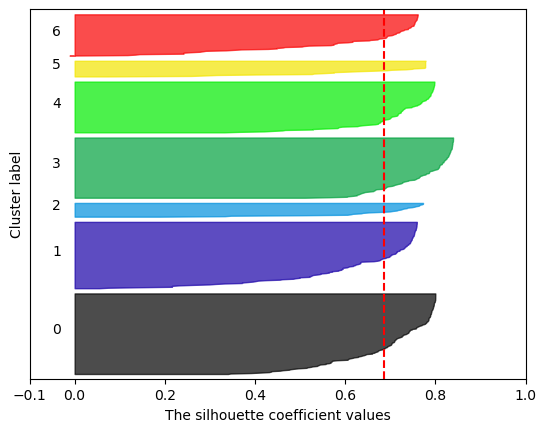

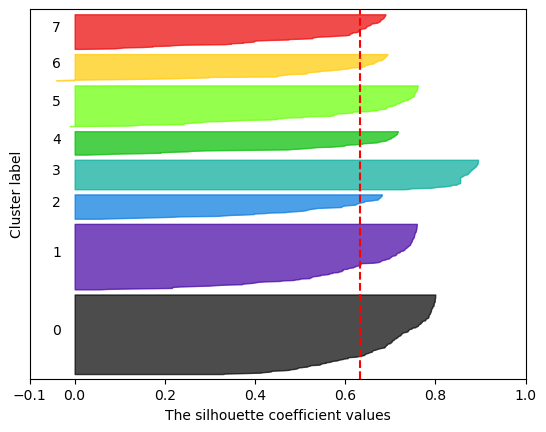

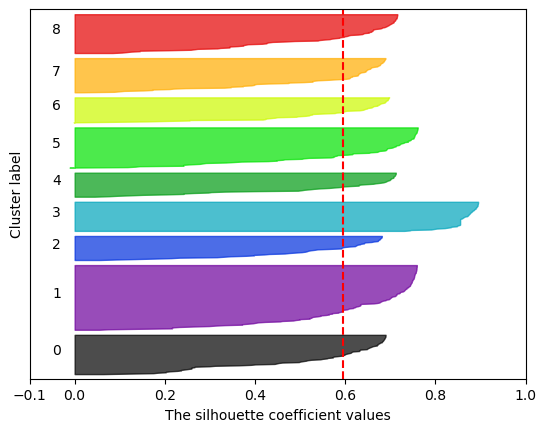

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


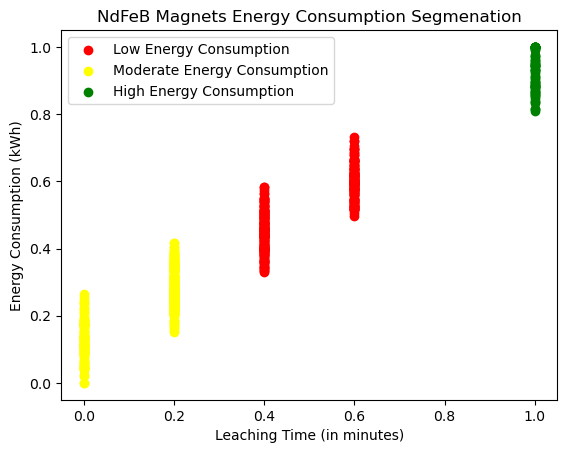

In [112]:
# Tasks 1-2 (Part 1): "leaching_time_min" vs. "energy_consumption_kwh" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["leaching_time_min", "energy_consumption_kwh"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["leaching_time_min", "energy_consumption_kwh"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Energy Consumption", "Moderate Energy Consumption", "High Energy Consumption"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "leaching_time_min"],
                clustering_data.loc[clustering_data.cluster == i, "energy_consumption_kwh"],
                c=colors[i], label=segments[i])
plt.title("NdFeB Magnets Energy Consumption Segmenation")
plt.xlabel("Leaching Time (in minutes)")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

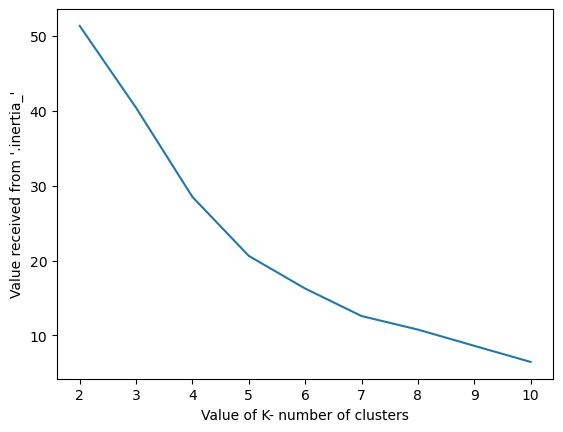

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 2 , the silhouette score is 50.54
For clusters = 2 , the davies bouldin score is 0.81
For clusters = 2 , the calinski harabasz score is 867.62

For clusters = 3 , the silhouette score is 45.83
For clusters = 3 , the davies bouldin score is 0.98
For clusters = 3 , the calinski harabasz score is 644.63

For clusters = 4 , the silhouette score is 46.74
For clusters = 4 , the davies bouldin score is 0.92
For clusters = 4 , the calinski harabasz score is 708.12

For clusters = 5 , the silhouette score is 48.73
For clusters = 5 , the davies bouldin score is 0.82
For clusters = 5 , the calinski harabasz score is 796.42

For clusters = 6 , the silhouette score is 51.83
For clusters = 6 , the davies bouldin score is 0.78
For clusters = 6 , the calinski harabasz score is 830.94



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 7 , the silhouette score is 53.31
For clusters = 7 , the davies bouldin score is 0.72
For clusters = 7 , the calinski harabasz score is 886.39

For clusters = 8 , the silhouette score is 52.25
For clusters = 8 , the davies bouldin score is 0.67
For clusters = 8 , the calinski harabasz score is 879.39

For clusters = 9 , the silhouette score is 55.58
For clusters = 9 , the davies bouldin score is 0.64
For clusters = 9 , the calinski harabasz score is 1049.31



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 10 , the silhouette score is 57.96
For clusters = 10 , the davies bouldin score is 0.57
For clusters = 10 , the calinski harabasz score is 1086.62

0.505401337648468


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.4399148319782493


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.4754489219267776
0.5081339669876666


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.5005694464845346


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.5524233051914597


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.572334184734357


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.5912121206808344


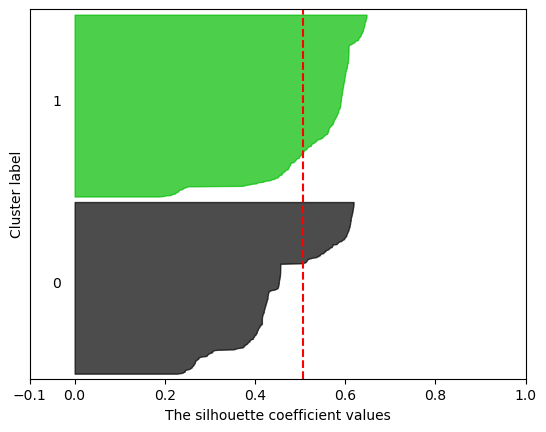

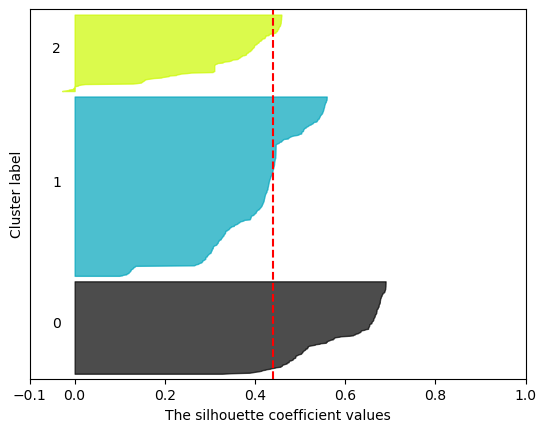

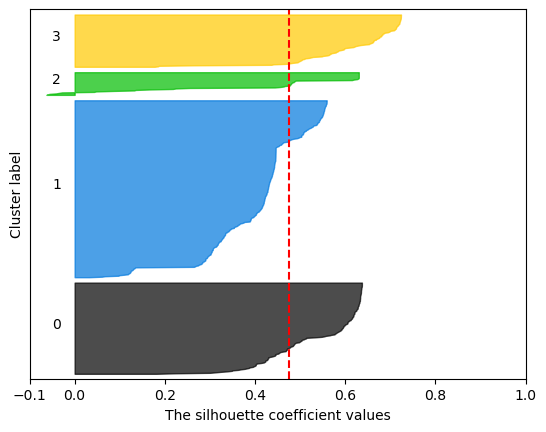

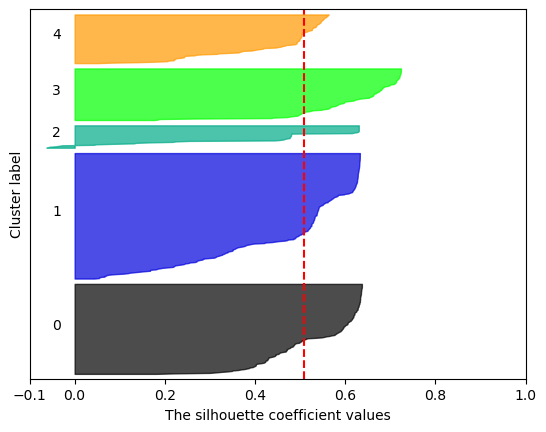

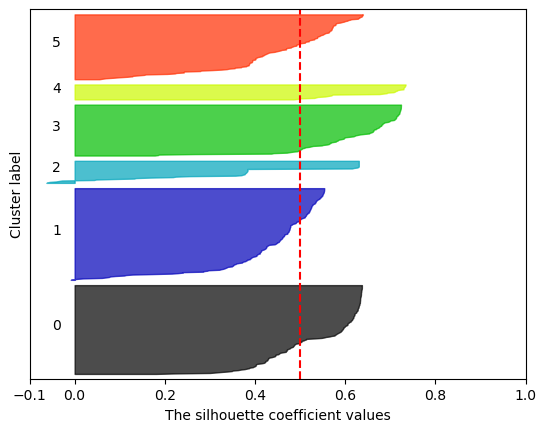

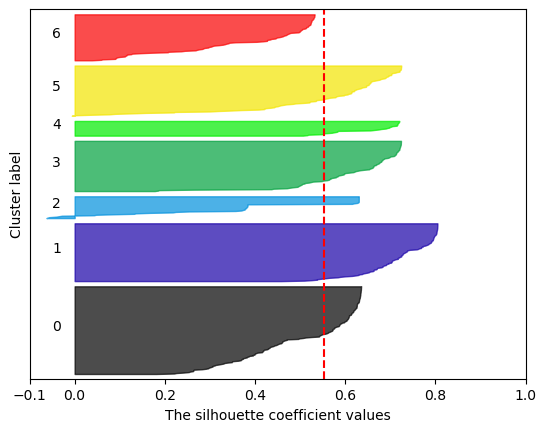

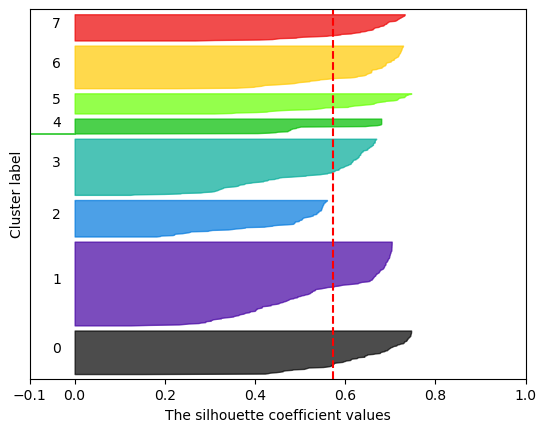

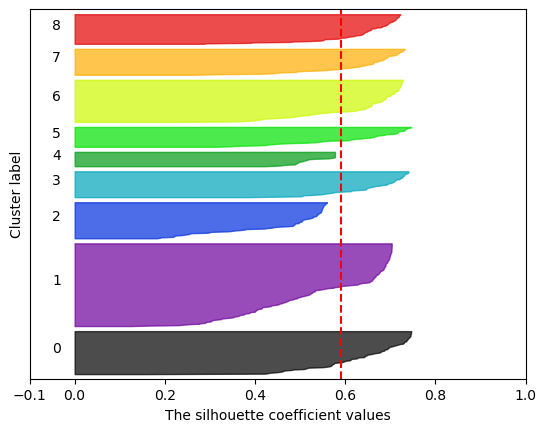

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


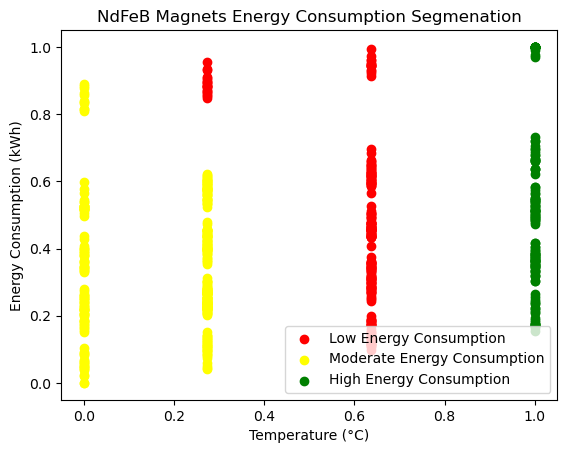

In [114]:
# Tasks 1-2 (Part 2): "temperature_C" vs. "energy_consumption_kwh" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["temperature_C", "energy_consumption_kwh"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["temperature_C", "energy_consumption_kwh"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Energy Consumption", "Moderate Energy Consumption", "High Energy Consumption"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "temperature_C"],
                clustering_data.loc[clustering_data.cluster == i, "energy_consumption_kwh"],
                c=colors[i], label=segments[i])
plt.title("NdFeB Magnets Energy Consumption Segmenation")
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

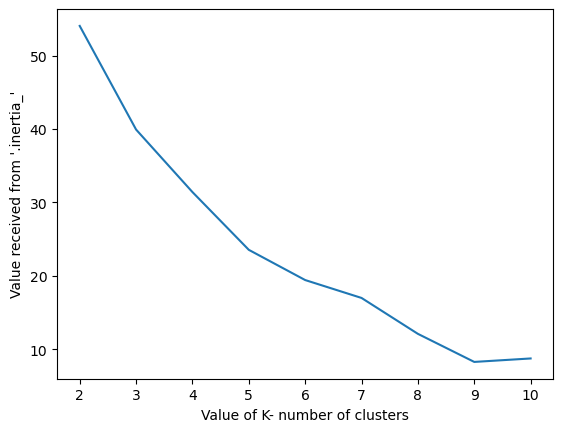

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 2 , the silhouette score is 47.09
For clusters = 2 , the davies bouldin score is 0.88
For clusters = 2 , the calinski harabasz score is 725.79

For clusters = 3 , the silhouette score is 41.14
For clusters = 3 , the davies bouldin score is 1.07
For clusters = 3 , the calinski harabasz score is 531.86

For clusters = 4 , the silhouette score is 41.35
For clusters = 4 , the davies bouldin score is 0.83
For clusters = 4 , the calinski harabasz score is 530.13

For clusters = 5 , the silhouette score is 44.09
For clusters = 5 , the davies bouldin score is 0.87
For clusters = 5 , the calinski harabasz score is 563.1



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 6 , the silhouette score is 50.12
For clusters = 6 , the davies bouldin score is 0.78
For clusters = 6 , the calinski harabasz score is 629.1



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 7 , the silhouette score is 53.88
For clusters = 7 , the davies bouldin score is 0.67
For clusters = 7 , the calinski harabasz score is 767.25



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 8 , the silhouette score is 54.15
For clusters = 8 , the davies bouldin score is 0.63
For clusters = 8 , the calinski harabasz score is 748.18

For clusters = 9 , the silhouette score is 57.45
For clusters = 9 , the davies bouldin score is 0.54
For clusters = 9 , the calinski harabasz score is 905.44

For clusters = 10 , the silhouette score is 59.13


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 10 , the davies bouldin score is 0.53
For clusters = 10 , the calinski harabasz score is 1190.53



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.4709433720049311
0.4316306249844073


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.43183787723242556
0.48725808096190626


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.5019187941347306
0.5502150302397052


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.5441166177497057
0.5779005807417257


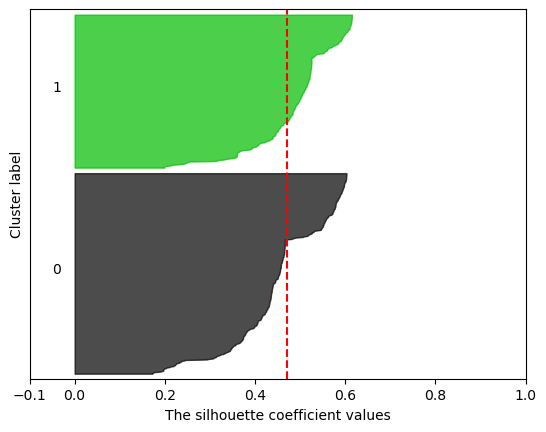

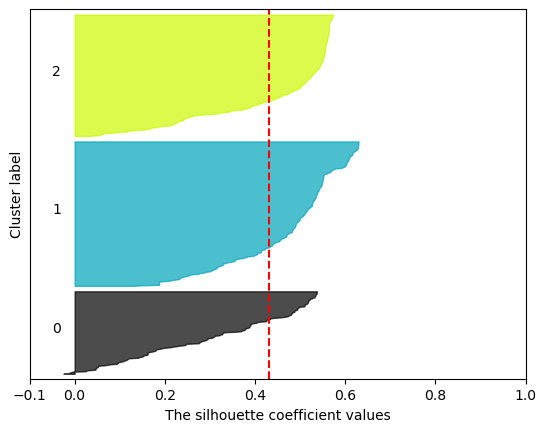

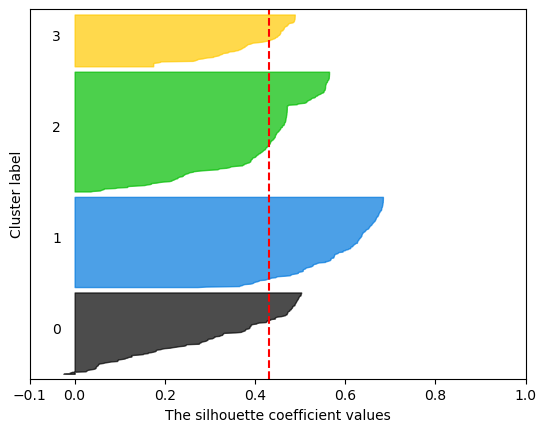

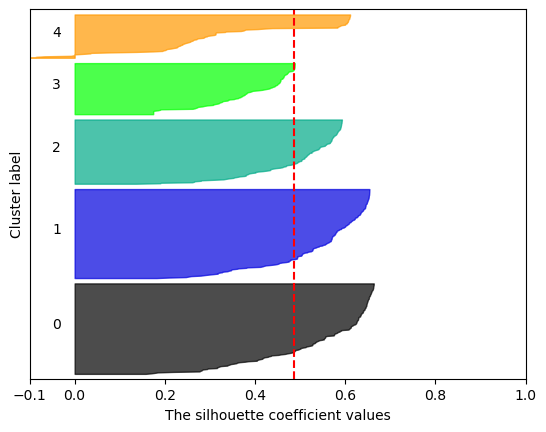

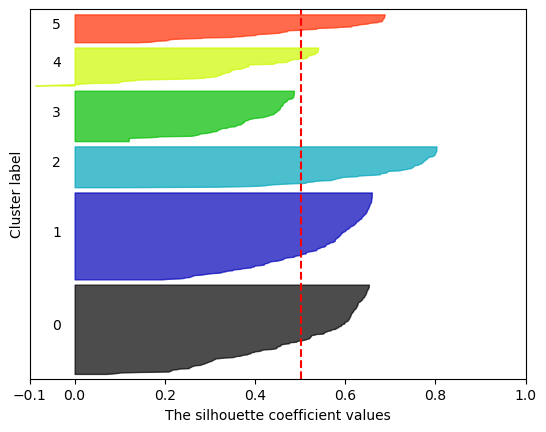

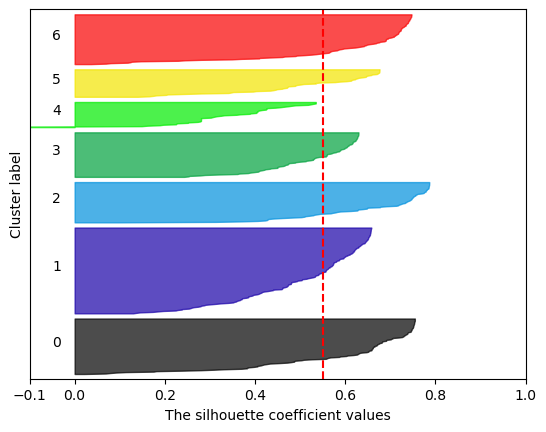

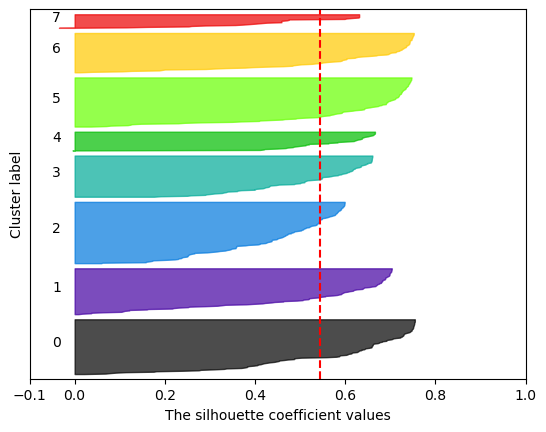

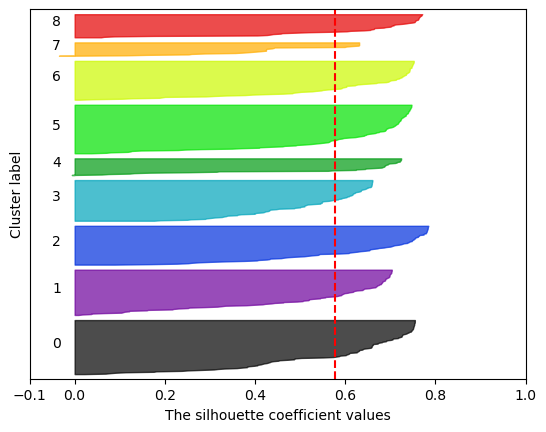

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


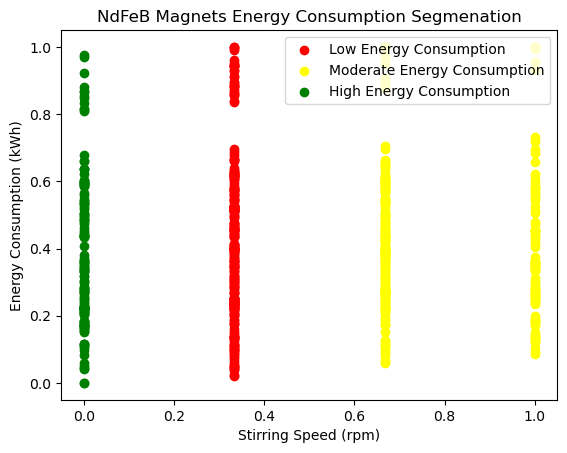

In [116]:
# Tasks 1-2 (Part 3): "stirring_speed_rpm" vs. "energy_consumption_kwh" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["stirring_speed_rpm", "energy_consumption_kwh"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["stirring_speed_rpm", "energy_consumption_kwh"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Energy Consumption", "Moderate Energy Consumption", "High Energy Consumption"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "stirring_speed_rpm"],
                clustering_data.loc[clustering_data.cluster == i, "energy_consumption_kwh"],
                c=colors[i], label=segments[i])
plt.title("NdFeB Magnets Energy Consumption Segmenation")
plt.xlabel("Stirring Speed (rpm)")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

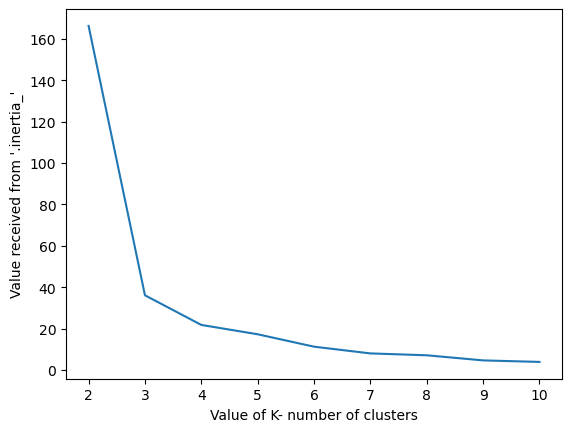

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 65.37
For clusters = 2 , the davies bouldin score is 0.48
For clusters = 2 , the calinski harabasz score is 1189.63

For clusters = 3 , the silhouette score is 76.12
For clusters = 3 , the davies bouldin score is 0.36
For clusters = 3 , the calinski harabasz score is 2709.06

For clusters = 4 , the silhouette score is 65.74
For clusters = 4 , the davies bouldin score is 0.46
For clusters = 4 , the calinski harabasz score is 3143.64

For clusters = 5 , the silhouette score is 67.36
For clusters = 5 , the davies bouldin score is 0.36
For clusters = 5 , the calinski harabasz score is 3017.71

For clusters = 6 , the silhouette score is 62.14
For clusters = 6 , the davies bouldin score is 0.47
For clusters = 6 , the calinski harabasz score is 3769.58

For clusters = 7 , the silhouette score is 59.53
For clusters = 7 , the davies bouldin score is 0.53
For clusters = 7 , the calinski harabasz score is 4414.34

For clusters = 8 , the silhouette score 

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

0.6536527299809586
0.7611611429740147


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6574234959342172
0.6045070120293075


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6193509491094198
0.6265748009191878
0.6012326850212794


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.593376872564926


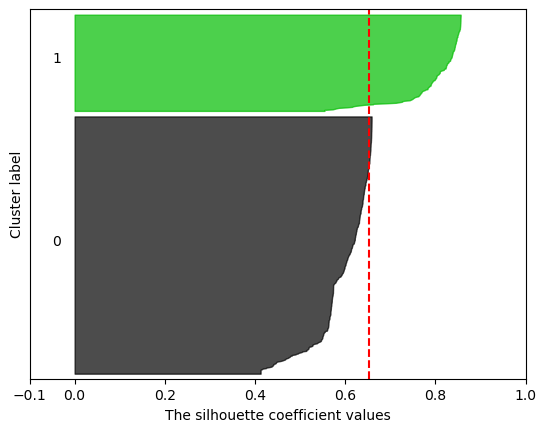

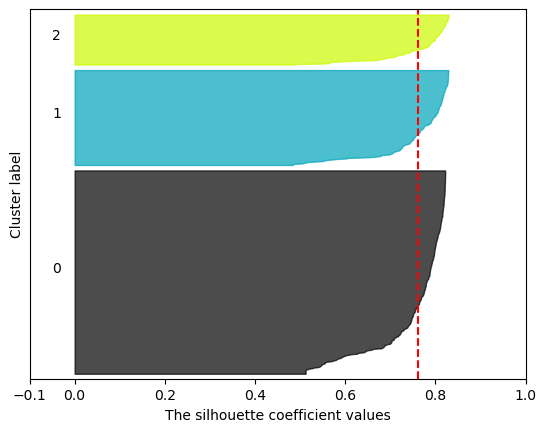

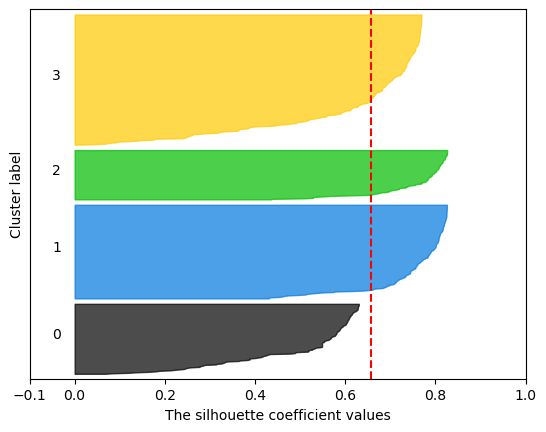

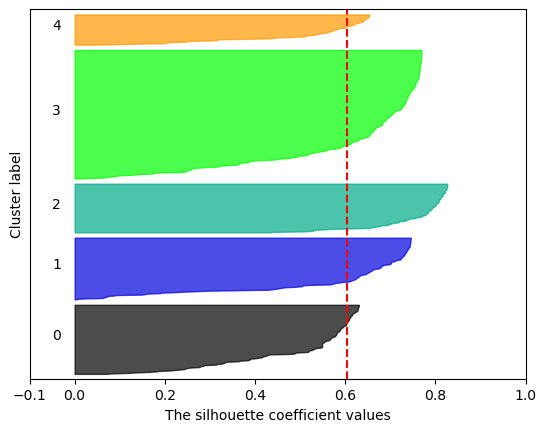

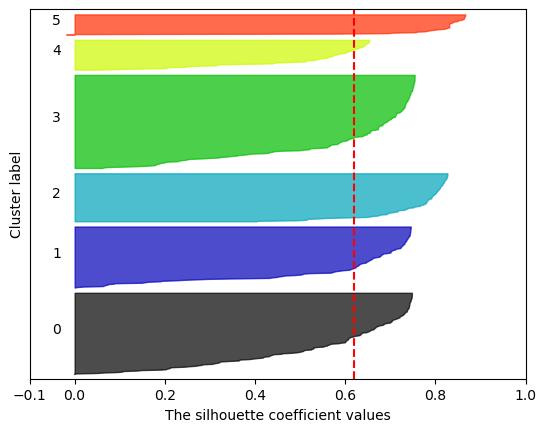

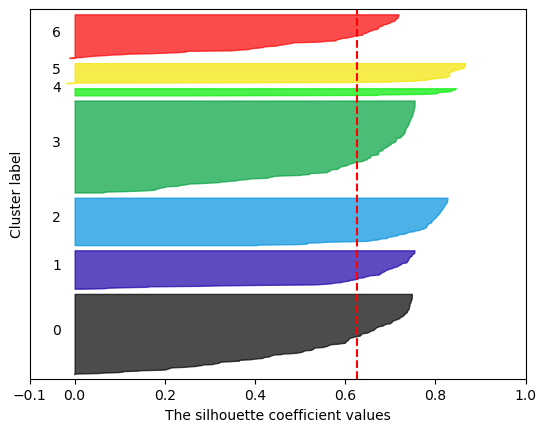

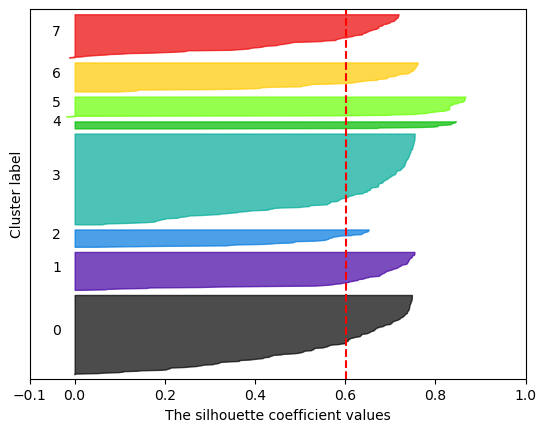

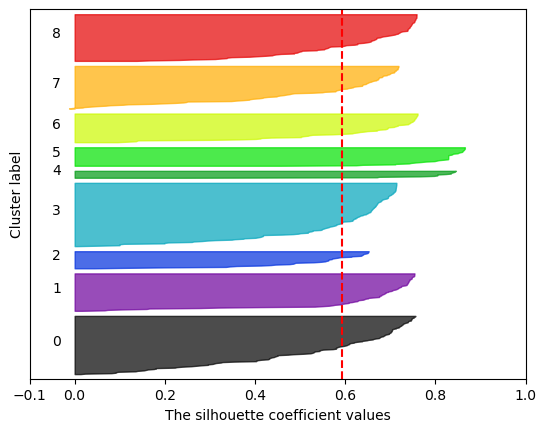

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


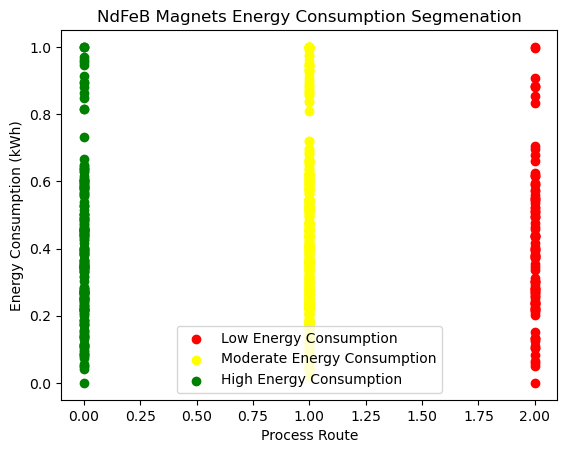

In [118]:
# Tasks 1-2 (Part 4): "process_route" vs. "energy_consumption_kwh" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["process_route", "energy_consumption_kwh"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["process_route", "energy_consumption_kwh"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Energy Consumption", "Moderate Energy Consumption", "High Energy Consumption"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "process_route"],
                clustering_data.loc[clustering_data.cluster == i, "energy_consumption_kwh"],
                c=colors[i], label=segments[i])
plt.title("NdFeB Magnets Energy Consumption Segmenation")
plt.xlabel("Process Route")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

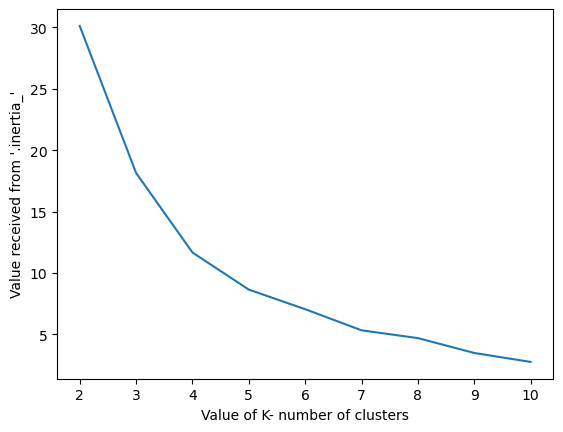

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 2 , the silhouette score is 56.04
For clusters = 2 , the davies bouldin score is 0.65
For clusters = 2 , the calinski harabasz score is 1283.21

For clusters = 3 , the silhouette score is 52.13
For clusters = 3 , the davies bouldin score is 0.66
For clusters = 3 , the calinski harabasz score is 1281.34

For clusters = 4 , the silhouette score is 49.58
For clusters = 4 , the davies bouldin score is 0.73
For clusters = 4 , the calinski harabasz score is 1536.6

For clusters = 5 , the silhouette score is 45.9
For clusters = 5 , the davies bouldin score is 0.72
For clusters = 5 , the calinski harabasz score is 1376.47



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 6 , the silhouette score is 47.29
For clusters = 6 , the davies bouldin score is 0.74
For clusters = 6 , the calinski harabasz score is 1389.11

For clusters = 7 , the silhouette score is 50.73
For clusters = 7 , the davies bouldin score is 0.69
For clusters = 7 , the calinski harabasz score is 1704.55



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 8 , the silhouette score is 52.71
For clusters = 8 , the davies bouldin score is 0.6
For clusters = 8 , the calinski harabasz score is 1717.94



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 9 , the silhouette score is 50.89
For clusters = 9 , the davies bouldin score is 0.65
For clusters = 9 , the calinski harabasz score is 1630.58



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 10 , the silhouette score is 52.47
For clusters = 10 , the davies bouldin score is 0.65
For clusters = 10 , the calinski harabasz score is 1710.16



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.5604013812095239
0.5026518365755959


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.4957972323504904


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.5199437917645522
0.49575704064628734


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.5231490497823628
0.5353283334415194


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.5644433795800098


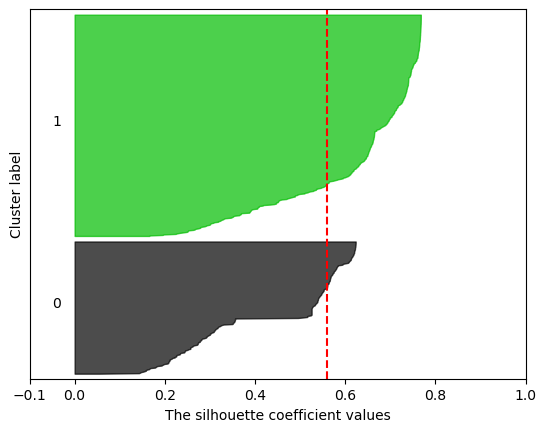

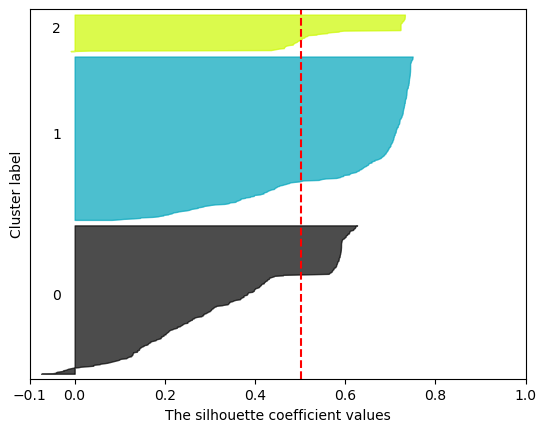

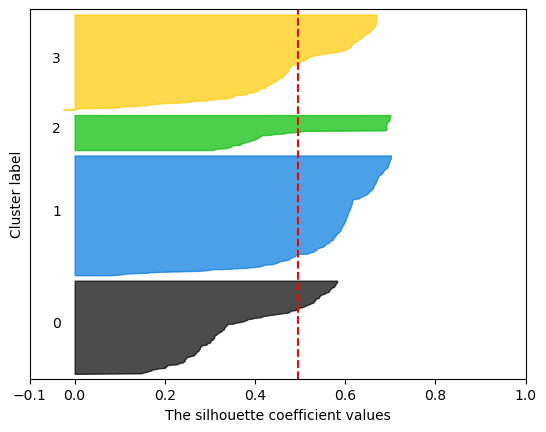

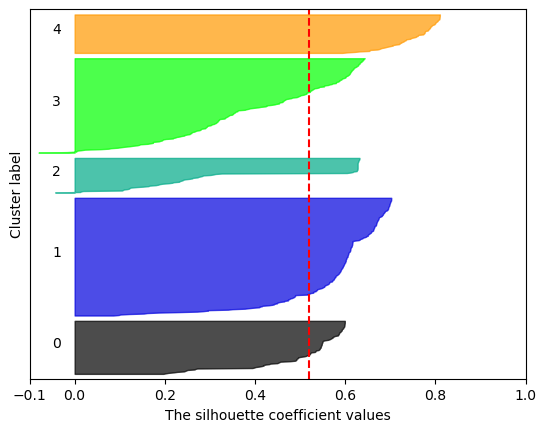

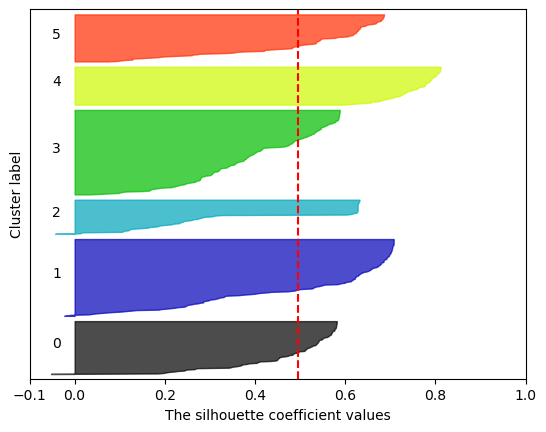

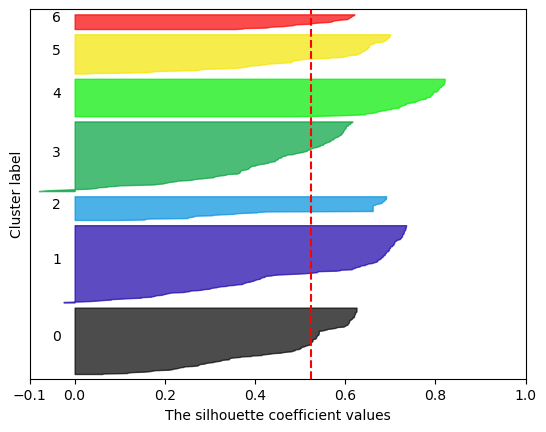

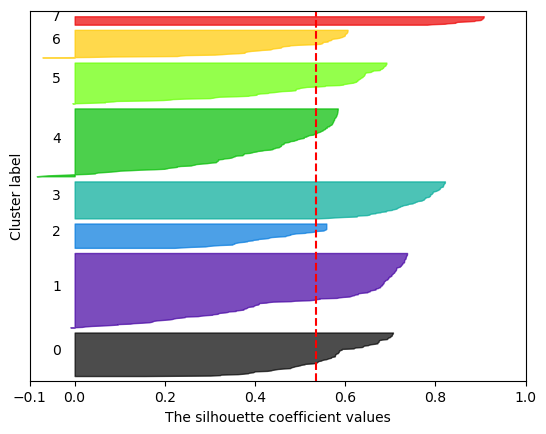

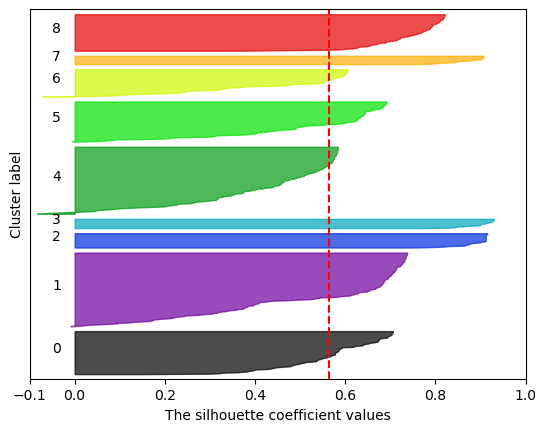

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


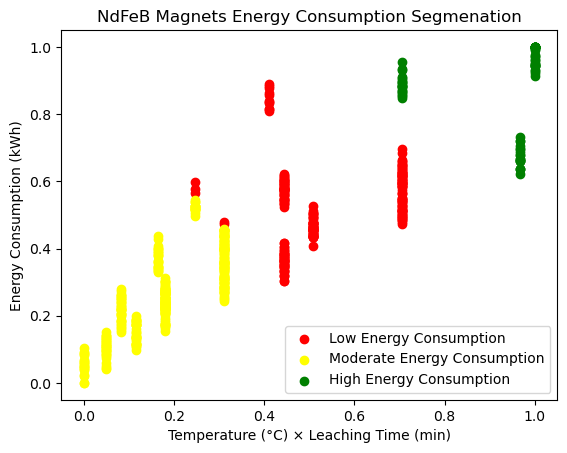

In [122]:
# Tasks 1-2 (Part 5): "temp_leach_interaction_C_min" vs. "energy_consumption_kwh" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["temp_leach_interaction_C_min", "energy_consumption_kwh"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["temp_leach_interaction_C_min", "energy_consumption_kwh"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Energy Consumption", "Moderate Energy Consumption", "High Energy Consumption"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "temp_leach_interaction_C_min"],
                clustering_data.loc[clustering_data.cluster == i, "energy_consumption_kwh"],
                c=colors[i], label=segments[i])
plt.title("NdFeB Magnets Energy Consumption Segmenation")
plt.xlabel("Temperature (°C) × Leaching Time (min)")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.show()